In [1]:
import itertools
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.



In [63]:
df = pd.read_excel(r'C:\Users\OLUFUNMILAYO\Downloads\fy2017_table2.xlsx')

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [64]:
df.head()

,Region and country of last residence,2010,2011,2012,2013,2014,2015,2016,2017
0,Austria-Hungary,4325,4703,3208,2061,2058,2965,2620,2886
1,Austria,3319,3654,2199,1053,1088,1928,1621,1962
2,Hungary,1006,1049,1009,1008,970,1037,999,924
3,Belgium,732,700,698,803,775,809,821,742
4,Bulgaria,2465,2549,2322,2720,2886,2585,2560,2070


In [65]:
df.dtypes

Region and country of last residence    object
2010                                    object
2011                                    object
2012                                    object
2013                                    object
2014                                    object
2015                                    object
2016                                    object
2017                                    object
dtype: object

In [66]:
df.columns = list(map(str, df.columns))

In [67]:
# let's rename the columns so that they make sense
df.rename(columns={'Region and country of last residence':'Country'}, inplace=True)

In [68]:
df.head()

,Country,2010,2011,2012,2013,2014,2015,2016,2017
0,Austria-Hungary,4325,4703,3208,2061,2058,2965,2620,2886
1,Austria,3319,3654,2199,1053,1088,1928,1621,1962
2,Hungary,1006,1049,1009,1008,970,1037,999,924
3,Belgium,732,700,698,803,775,809,821,742
4,Bulgaria,2465,2549,2322,2720,2886,2585,2560,2070


In [69]:
df.columns = list(map(str, df.columns))

In [70]:
df['2010'] = pd.to_numeric(df['2010'], errors='coerce')

In [71]:
df['2011'] = pd.to_numeric(df['2011'], errors='coerce')

In [72]:
df['2013'] = pd.to_numeric(df['2013'], errors='coerce')

In [73]:
df['2012'] = pd.to_numeric(df['2012'], errors='coerce')

In [74]:
df['2014'] = pd.to_numeric(df['2014'], errors='coerce')

In [75]:
df['2015'] = pd.to_numeric(df['2015'], errors='coerce')

In [76]:
df['2016'] = pd.to_numeric(df['2016'], errors='coerce')

In [77]:
df['2017'] = pd.to_numeric(df['2017'], errors='coerce')

In [78]:
df.dtypes

Country     object
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
dtype: object

In [79]:
df.set_index('Country', inplace=True)


In [80]:
df['Total'] = df.sum(axis=1)

In [81]:
years = list(map(str, range(2010, 2017)))
df.shape

(105, 9)

In [82]:
df.head()

,2010,2011,2012,2013,2014,2015,2016,2017,Total
Country,,,,,,,,,
Austria-Hungary,4325.0,4703.0,3208.0,2061.0,2058.0,2965.0,2620.0,2886.0,24826.0
Austria,3319.0,3654.0,2199.0,1053.0,1088.0,1928.0,1621.0,1962.0,16824.0
Hungary,1006.0,1049.0,1009.0,1008.0,970.0,1037.0,999.0,924.0,8002.0
Belgium,732.0,700.0,698.0,803.0,775.0,809.0,821.0,742.0,6080.0
Bulgaria,2465.0,2549.0,2322.0,2720.0,2886.0,2585.0,2560.0,2070.0,20157.0


In [83]:
dfimmigtrend = pd.DataFrame(df[years].sum(axis=0))



In [84]:
# change the years to type int 
dfimmigtrend.index = map(int, dfimmigtrend.index)



In [85]:
# reset the index to put in back in as a column in the df_tot dataframe
dfimmigtrend.reset_index(inplace = True)



In [86]:
# rename columns
dfimmigtrend.columns = ['year', 'total']



In [87]:
# view the final dataframe
dfimmigtrend.head()

,year,total
0,2010,1193947.0
1,2011,1207110.0
2,2012,1168468.0
3,2013,1121689.0
4,2014,1159585.0


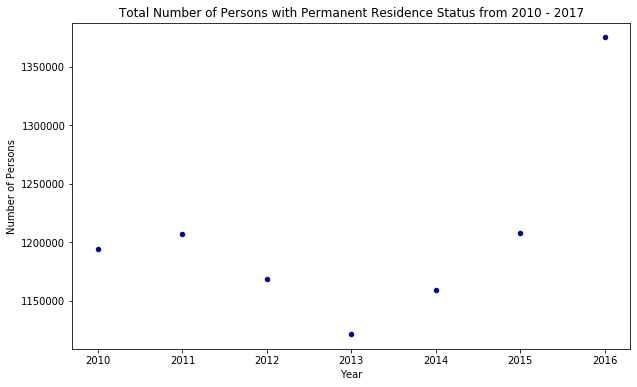

In [88]:
dfimmigtrend.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Number of Persons with Permanent Residence Status from 2010 - 2017')
plt.xlabel('Year')
plt.ylabel('Number of Persons')

plt.show()

In [90]:
x = dfimmigtrend['year']      # year on x-axis
y = dfimmigtrend['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 1.91157857e+04, -3.72752936e+07])

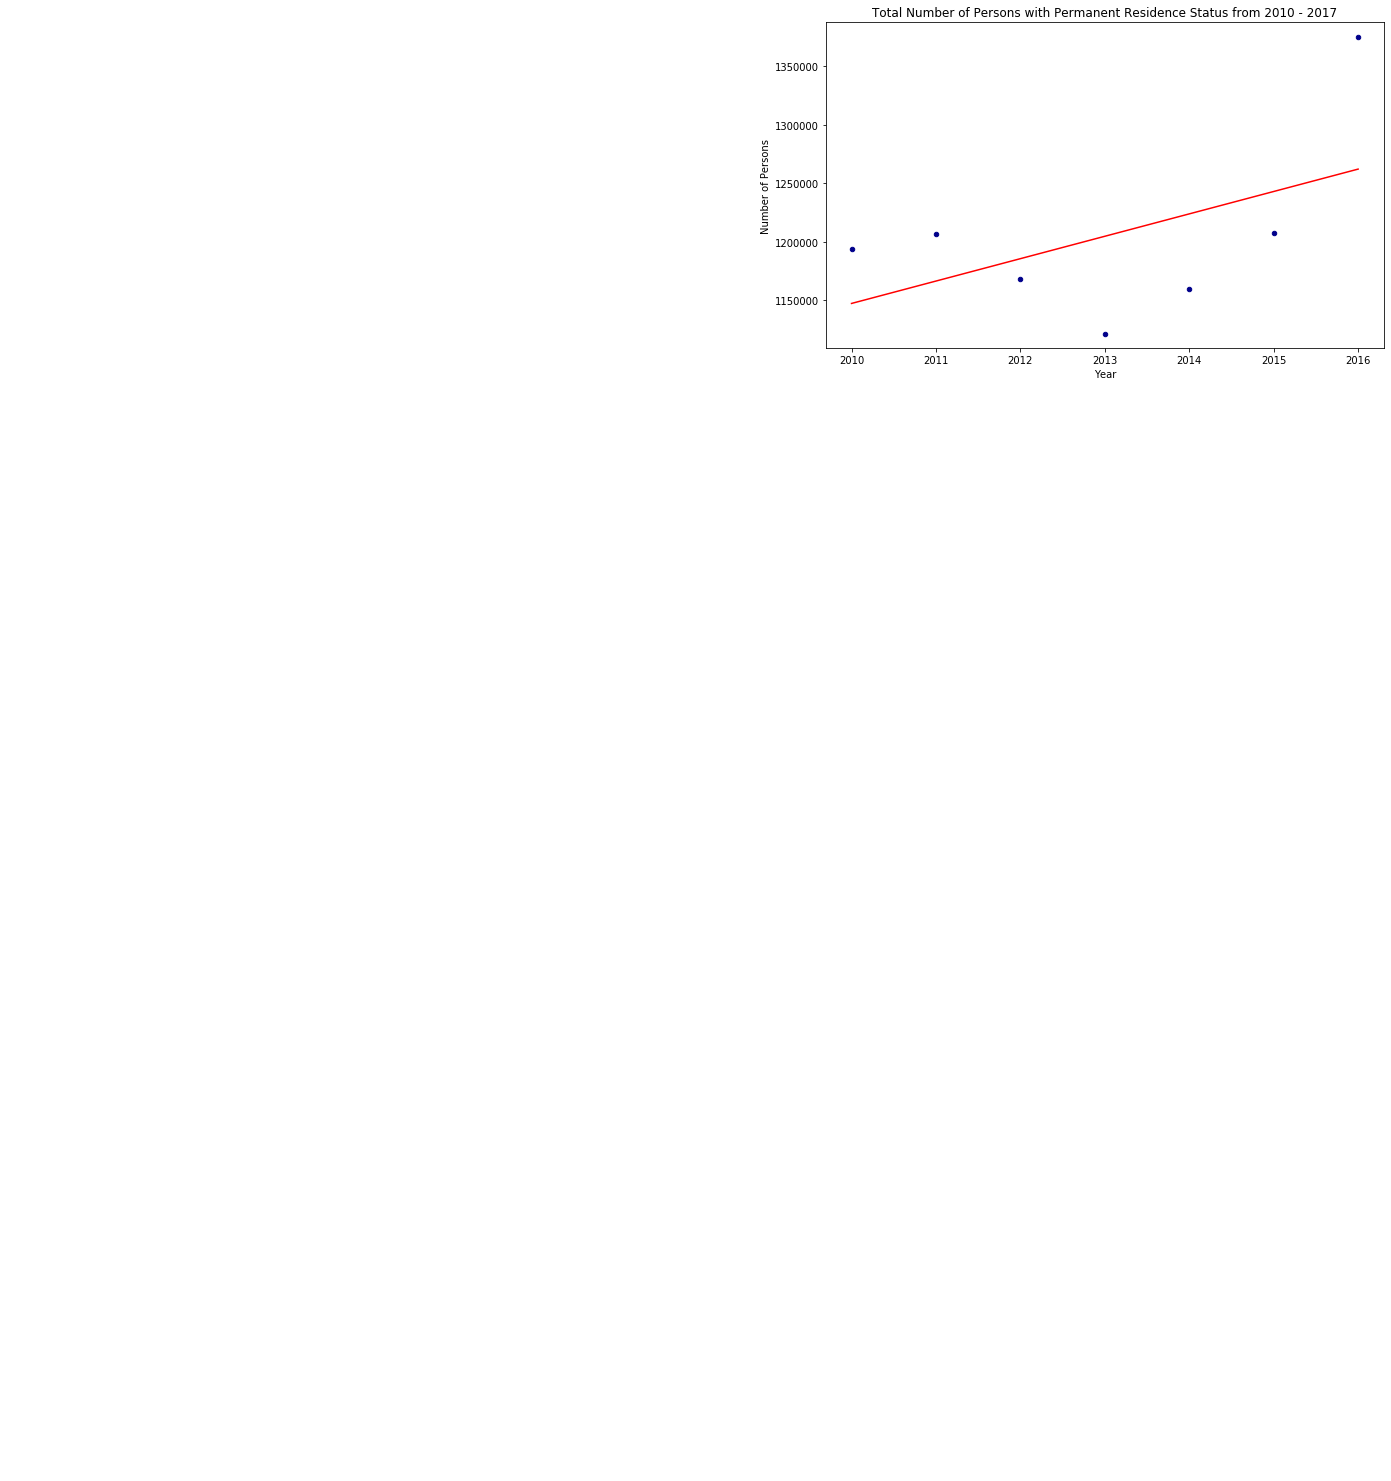

'No. Persons = 19116 * Year + -37275294'

In [91]:
dfimmigtrend.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Number of Persons with Permanent Residence Status from 2010 - 2017')
plt.xlabel('Year')
plt.ylabel('Number of Persons')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') 
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Persons = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

In [92]:
 19116 * 2020 + -37275294

1339026